<a href="https://colab.research.google.com/github/JadonTelep/MAT-421/blob/main/SP_24_MAT_421_Module_F_Numerical_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module F - Numerical Differentiation**

## Section 20.1 (Numerical Differentiation Problem Statement)

A **numerical grid** is an evenly spaced set of points over the domain of a function (i.e., the independent variable), over some interval. The **spacing** or **step size** of a numerical grid is the distance between adjacent points on the grid. For the purpose of this text, if $x$ is a numerical grid, then $x_j$ is the $j^{th}$ point in the numerical grid and $h$ is the spacing between $x_{j−1}$ and $x_j$. The following figure shows an example of a numerical grid.

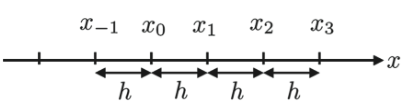

There are several functions in Python that can be used to generate numerical grids. For numerical grids in one dimension, it is sufficient to use the linspace function, which you have already used for creating regularly spaced arrays.

In Python, a function $f(x)$ can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this discrete or discretized representation is useful for numerical calculations and corresponds to data sets that may be acquired in engineering and science practice. Specifically, the function value may only be known at discrete points. For example, a temperature sensor may deliver temperature versus time pairs at regular time intervals. Although temperature is a smooth and continuous function of time, the sensor only provides values at discrete time intervals, and in this particular case, the underlying function would not even be known.

Whether $f$ is an analytic function or a discrete representation of one, we would like to derive methods of approximating the derivative of $f$ over a numerical grid and determine their accuracy.

## Section 20.2 (Finite Difference Approximation)

### Section 20.2.1 (Finite Difference Approximating Derivatives)

The derivative $f'(x)$ of a function $f(x)$ at the point $x=a$
 is defined as:

$f'(a) = \lim\limits_{x \to a}\frac{f(x) - f(a)}{x-a}$

The derivative at $x=a$ is the slope at this point. In **finite difference** approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal. There are various finite difference formulas used in different applications, and three of these, where the derivative is calculated using the values of two points, are presented below.

The **forward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_j,f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$:

$f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}$

The **backward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j,f(x_j))$:

$f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}$

The **central difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$
:

$f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}$

The following figure illustrates the three different type of formulas to estimate the slope.

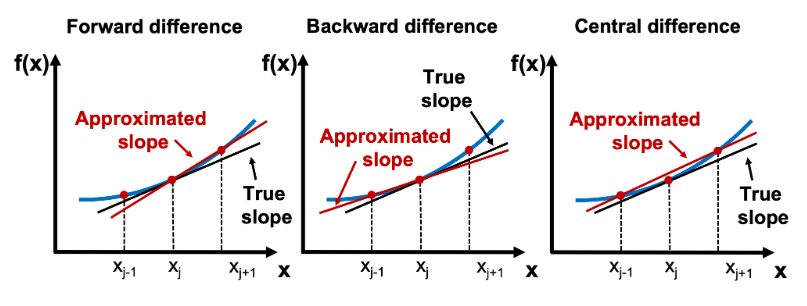

### Section 20.2.2 (Finite Difference Approximating Derivatives with Taylor Series)

To derive an approximation for the derivative of $f$, we return to Taylor series. For an arbitrary function $f(x)$ the Taylor series of $f$ around $a=x_j$ is

$f(x) = \frac{f(x_j)(x - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x - x_j)^1}{1!} + \frac{f''(x_j)(x - x_j)^2}{2!} + \frac{f'''(x_j)(x - x_j)^3}{3!} + \cdots.$

If $x$ is on a grid of points with spacing $h$, we can compute the Taylor series at $x=x_j+1$ to get

$f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x_{j+1}- x_j)^1}{1!} + \frac{f''(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f'''(x_j)(x_{j+1} - x_j)^3}{3!} + \cdots.$

Substituting $h=x_j+1−x_j$ and solving for $f'(x_j)$ gives the equation

$f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + \left(-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots\right).$

The terms that are in parentheses, $-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots$, are called **higher order terms** of $h$. The higher order terms can be rewritten as

$-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots = h(\alpha + \epsilon(h)),$

where $α$ is some constant, and $ϵ(h)$ is a function of $h$ that goes to zero as $h$ goes to 0. You can verify with some algebra that this is true. We use the abbreviation $“O(h)”$ for $h(α+ϵ(h))$, and in general, we use the abbreviation $“O(hp)”$ to denote $h^p(α+ϵ(h))$.

Substituting $O(h)$ into the previous equations gives

$f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + O(h).$

This gives the **forward difference** formula for approximating derivatives as

$f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h},$

and we say this formula is $O(h)$.

Here, $O(h)$ describes the **accuracy** of the forward difference formula for approximating derivatives. For an approximation that is $O(h^p)$, we say that $p$ is the order of the accuracy of the approximation. With few exceptions, higher order accuracy is better than lower order. To illustrate this point, assume $q<p$. Then as the spacing, $h>0$, goes to 0, $h^p$ goes to 0 faster than $h^q$. Therefore as $h$ goes to 0, an approximation of a value that is $O(h^p)$ gets closer to the true value faster than one that is $O(h^q)$.

By computing the Taylor series around $a=x_j$ at $x=x_j−1$ and again solving for $f(x_j)$, we get the backward difference formula

$f^{\prime}(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h},$

which is also $O(h)$. You should try to verify this result on your own.

Intuitively, the forward and backward difference formulas for the derivative at $x_j$ are just the slopes between the point at $x_j$ and the points $x_{j+1}$ and $x_{j-1}$, respectively.

We can construct an improved approximation of the derivative by clever manipulation of Taylor series terms taken at different points. To illustrate, we can compute the Taylor series around $a=x_j$ at both $x_{j+1}$ and $x_{j−1}$. Written out, these equations are

$f(x_{j+1}) = f(x_j) + f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 + \frac{1}{6}f'''(x_j)h^3 + \cdots$

and

$f(x_{j-1}) = f(x_j) - f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 - \frac{1}{6}f'''(x_j)h^3 + \cdots.$

Subtracting the formulas above gives

$f(x_{j+1}) - f(x_{j-1}) = 2f^{\prime}(x_j) + \frac{2}{3}f'''(x_j)h^3 + \cdots,$

which when solved for $f'(x_j)$ gives the central difference formula

$f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}.$

Because of how we subtracted the two equations, the $h$ terms canceled out; therefore, the central difference formula is $O(h^2)$, even though it requires the same amount of computational effort as the forward and backward difference formulas! Thus the central difference formula gets an extra order of accuracy for free. In general, formulas that utilize symmetric points around $x_j$, for example $x_j-1$ and $x_j+1$, have better accuracy than asymmetric ones, such as the forward and background difference formulas.

The following figure shows the forward difference (line joining $(x_j,f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$, backward difference (line joining $(x_j,f(x_j))$ and $(x_{j-1}, f(x_{j-1}))$, and central difference (line joining $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$) approximation of the derivative of a function $f$. As can be seen, the difference in the value of the slope can be significantly different based on the size of the step $h$ and the nature of the function.

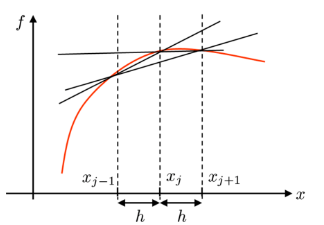

**EXAMPLE:** Take the Taylor series of $f$ around $a=x_j$ and compute the series at $x = x_{j-2}, x_{j-1}, x_{j+1}, x_{j+2}$. Show that the resulting equations can be combined to form an approximation for $f'(xj)$ that is $O(h^4)$.

First, compute the Taylor series at the specified points.

$
\begin{split}
\begin{eqnarray*}
f(x_{j-2}) &=& f(x_j) - 2hf^{\prime}(x_j) + \frac{4h^2f''(x_j)}{2} - \frac{8h^3f'''(x_j)}{6} + \frac{16h^4f''''(x_j)}{24} - \frac{32h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j-1}) &=& f(x_j) - hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + \frac{h^4f''''(x_j)}{24} - \frac{h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j+1}) &=& f(x_j) + hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} + \frac{h^3f'''(x_j)}{6} + \frac{h^4f''''(x_j)}{24} + \frac{h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j+2}) &=& f(x_j) + 2hf^{\prime}(x_j) + \frac{4h^2f''(x_j)}{2} + \frac{8h^3f'''(x_j)}{6} + \frac{16h^4f''''(x_j)}{24} + \frac{32h^5f'''''(x_j)}{120} + \cdots
\end{eqnarray*}
\end{split}
$

To get the $h^2$, $h^3$, and $h^4$ terms to cancel out, we can compute

$f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j-1}) - f(x_{j+2}) = 12hf^{\prime}(x_j) - \frac{48h^5f'''''(x_j)}{120}$

which can be rearranged to

$f^{\prime}(x_j) = \frac{f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j-1}) - f(x_{j+2})}{12h} + O(h^4).$

This formula is a better approximation for the derivative at $x_j$ than the central difference formula, but requires twice as many calculations.

**TIP!** Python has a command that can be used to compute finite differences directly: for a vector $f$, the command *d=np.diff(f)* produces an array $d$ in which the entries are the differences of the adjacent elements in the initial array $f$. In other words $d(i)=f(i+1)-f(i)$.

**WARNING!** When using the command *np.diff*, the size of the output is one less than the size of the input since it needs two arguments to produce a difference.

**EXAMPLE:** Consider the function $f(x)=cos(x)$. We know the derivative of $cos(x)$ is $-sin(x)$. Although in practice we may not know the underlying function we are finding the derivative for, we use the simple example to illustrate the aforementioned numerical differentiation methods and their accuracy. The following code computes the derivatives numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-1-710ff8d2ab31>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


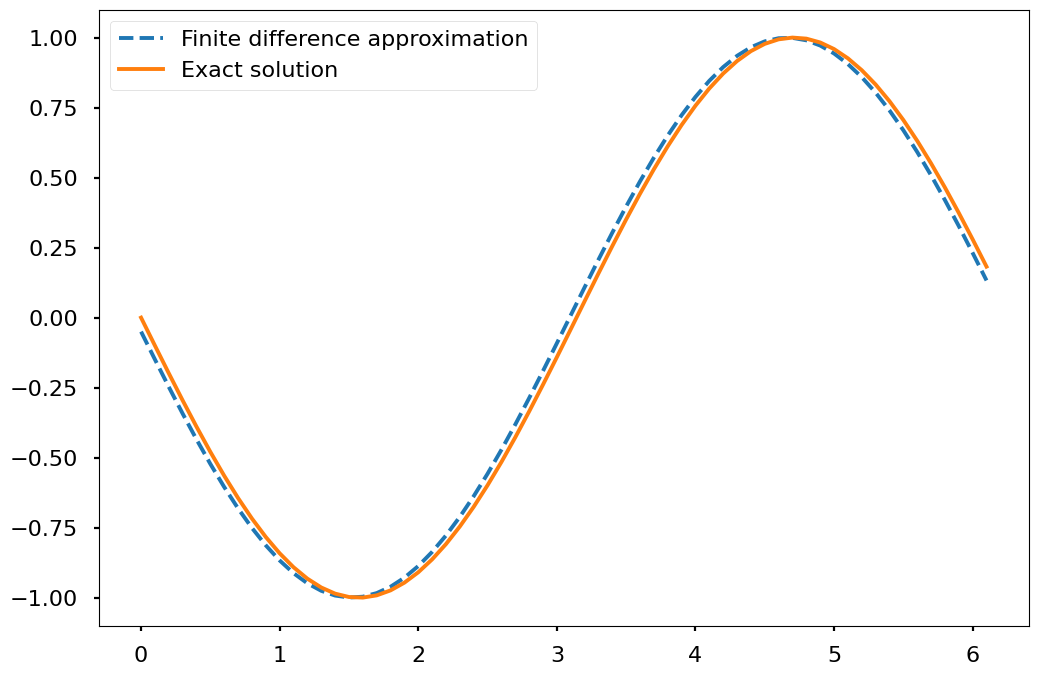

0.049984407218554114


In [2]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

As the above figure shows, there is a small offset between the two curves, which results from the numerical error in the evaluation of the numerical derivatives. The maximal error between the two numerical results is of the order 0.05 and expected to decrease with the size of the step.

As illustrated in the previous example, the finite difference scheme contains a numerical error due to the approximation of the derivative. This difference decreases with the size of the discretization step, which is illustrated in the following example.

**EXAMPLE:** The following code computes the numerical derivative of $f(x)=cos(x)$ using the forward difference formula for decreasing step sizes, $h$. It then plots the maximum error between the approximated derivative and the true derivative versus $h$ as shown in the generated figure.

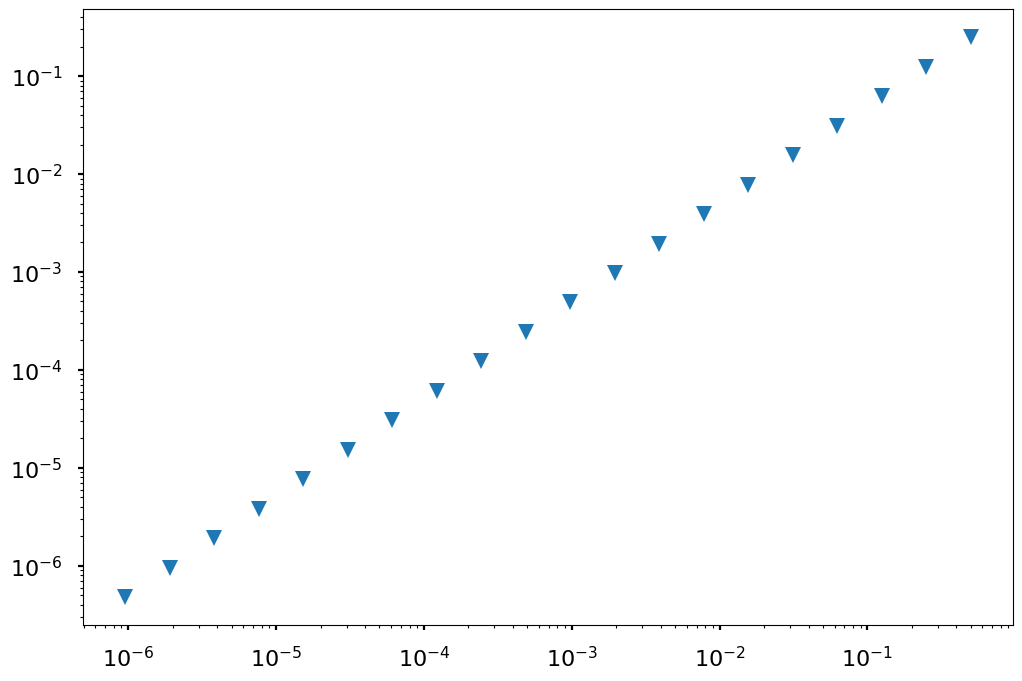

In [3]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

The slope of the line in log-log space is **1**; therefore, the error is proportional to $h^1$, which means that, as expected, the forward difference formula is $O(h)$.

## Section 20.3 (Approximating of Higher Order Derivatives)

It also possible to use Taylor series to approximate higher order derivatives (e.g., $f''(xj)$, $f'''(xj)$, etc.). For example, taking the Taylor series around $a=x_j$ and then computing it at $x=x_{j−1}$ and $x_{j+1}$ gives

$f(x_{j-1}) = f(x_j) - hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + \cdots$

and

$f(x_{j+1}) = f(x_j) + hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} + \frac{h^3f'''(x_j)}{6} + \cdots.$

If we add these two equations together, we get

$f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2f''(x_j) + \frac{h^4f''''(x_j)}{24} + \cdots,$

and with some rearrangement gives the approximation

$f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2},$

and is $O(h^2)$.

## Section 20.4 (Numerical Differentiation with Noise)

As stated earlier, sometimes $f$ is given as a vector where $f$ is the corresponding function value for independent data values in another vector $x$, which is gridded. Sometimes data can be contaminated with noise, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function. This can often occur in engineering due to inaccuracies in measurement devices or the data itself can be slightly modified by perturbations outside the system of interest. For example, you may be trying to listen to your friend talk in a crowded room. The signal $f$ might be the intensity and tonal values in your friend's speech. However, because the room is crowded, noise from other conversations are heard along with your friend's speech, and he becomes difficult to understand.

To illustrate this point, we numerically compute the derivative of a simple cosine wave corrupted by a small sin wave. Consider the following two functions:

$f(x)=cos(x)$

and

$f_{\epsilon,\omega}(x) = \cos(x)+\epsilon \sin(\omega x)$

where $0<ϵ≪1$ is a very small number and $ω$ is a large number. When $ϵ$ is small, it is clear that $f≃f_{ϵ,ω}$. To illustrate this point, we plot $f_{ϵ,ω}(x)$ for $ϵ=0.01$ and $ω=100$, and we can see it is very close to $f(x)$, as shown in the following figure.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-4-710ff8d2ab31>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


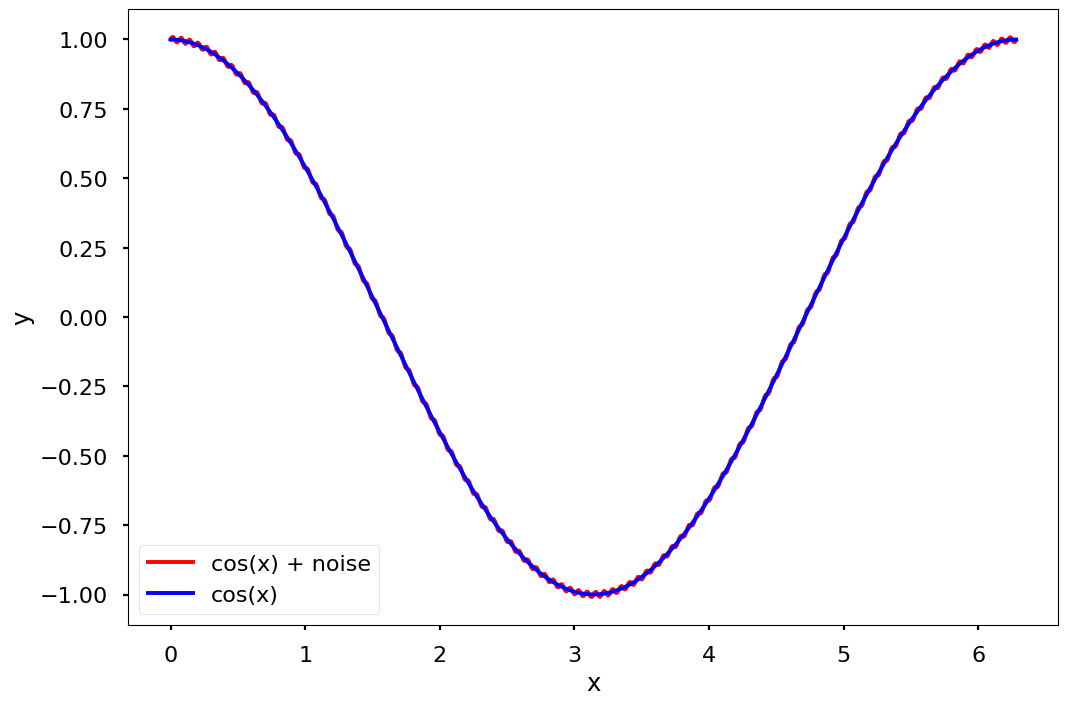

In [5]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The derivatives of our two test functions are

$f'(x)=−sin(x)$

and

$f_{\epsilon,\omega}^{\prime}(x) = -\sin(x)+\epsilon\omega \cos(\omega x).$

Since $ϵω$ may not be small when $ω$ is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable. For instance, the following figure shows $f'(x)$ and $f'_{ϵ,ω}(x)$ for $ϵ=0.01$ and $ω=100$.

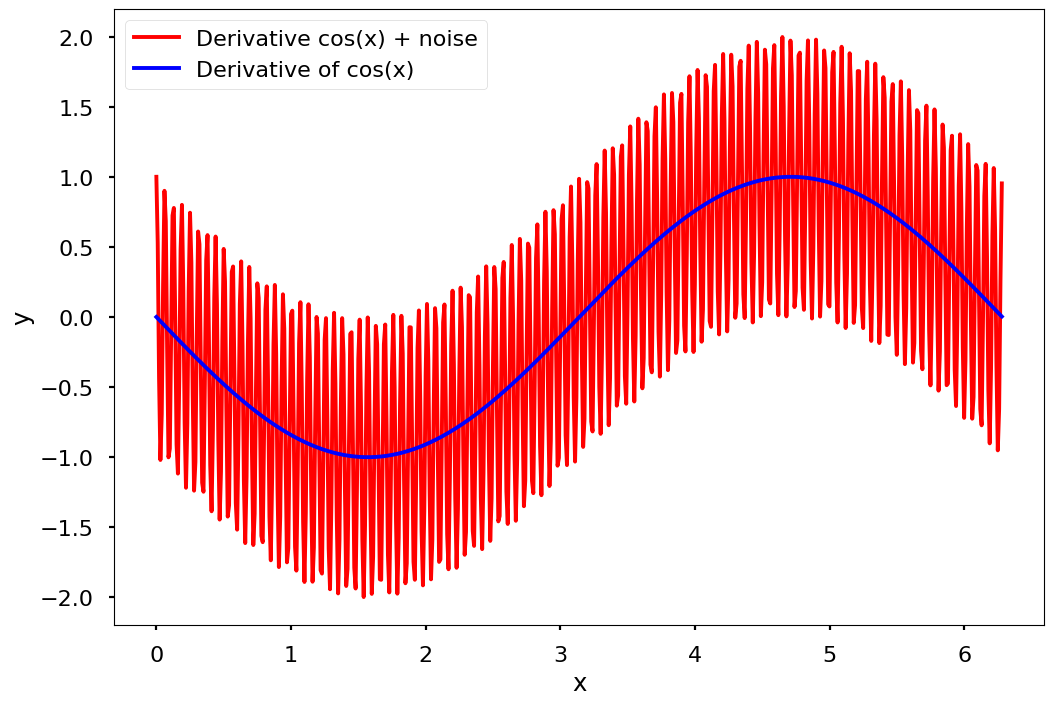

In [6]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()